# Building first Complete Neural Network in tensorflow

There are two parts to implement a tensorflow model:
1. Create the computation graph
2. Run the graph

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
import matplotlib.pyplot as plt

In [3]:
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)
X_train, X_test, y_train, y_test  = mnist.train.images , mnist.test.images, mnist.train.labels, mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55000, 784), (10000, 784), (55000, 10), (10000, 10))

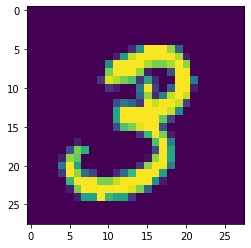

label:  3


In [5]:
plt.imshow(X_train[1].reshape(28,28))
plt.show()
print('label: ',np.argmax(y_train[1]))

In [6]:
X_train.max()
# No need to normalize

1.0

In [8]:
# Create placeholder for inputs
def input_placeholder():
    """
    X = input image (n_images, pixel)
    Y = input target varaible (n_label, one_hot)
    """
    X = tf.placeholder(dtype=tf.float32, shape=[None,784])
    Y = tf.placeholder(dtype=tf.float32, shape=[None,10])
    
    return X,Y

In [10]:
# Parameter initialization
def initialization_param():
    """
    w1,w2,w3 = weights of 1st,2nd,3rd layers of NN
    b1,b2,b3 = bias of layers 
    """
    w1 = tf.get_variable(name='W_1',initializer=tf.contrib.layers.xavier_initializer(),shape=[784,200])
    w2 = tf.get_variable(name='W_2',initializer=tf.contrib.layers.xavier_initializer(),shape=[200,50])
    w3 = tf.get_variable(name='W_3',initializer=tf.contrib.layers.xavier_initializer(),shape=[50,10])
    b1 = tf.get_variable(name='b_1',initializer=tf.zeros_initializer(),shape=[200])
    b2 = tf.get_variable(name='b_2',initializer=tf.zeros_initializer(),shape=[50])
    b3 = tf.get_variable(name='b_3',initializer=tf.zeros_initializer(),shape=[10])
    parameters = {'W_1':w1,
                 'W_2':w2,
                 'W_3':w3,
                 'b_1':b1,
                 'b_2':b2,
                 'b_3':b3}
    return parameters

In [15]:
# Forward Propagation:
def forward_propagation(X,parameters):
    """
    X = input images
    parameters = initilization weights
    """
    a_1 = tf.nn.relu_layer(x=X, weights=parameters['W_1'], biases=parameters['b_1'])
    a_2 = tf.nn.relu_layer(x=a_1, weights=parameters['W_2'],biases=parameters['b_2'])
    #a_3 = tf.nn.softmax(tf.add(tf.matmul(a_2,parameters['W_3']),parameters['b_3']))
    a_3 = tf.add(tf.matmul(a_2,parameters['W_3']), parameters['b_3'])
    return a_3

In [16]:
tf.reset_default_graph()
X,Y = input_placeholder()
param = initialization_param()
a_3 = forward_propagation(X,param)
a_3

<tf.Tensor 'Add:0' shape=(?, 10) dtype=float32>

In [23]:
# Compute Cost
def compute_cost(y_pred, y_true):
    #y_true = tf.cast(y_true,tf.float32)
    #y_pred = tf.cast(y_pred,tf.float32)
    #logit = tf.transpose(y_pred)
    #label = tf.transpose(y_true)
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred, labels=y_true))

In [24]:
cost = compute_cost(a_3, Y)
cost

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [76]:
# Backward Propagation
def backpropagation(cost):
    return tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [77]:
# prediction
def prediction(X,parameters):
    return forward_propagation(X,parameters)

In [78]:
import math

Cost after epoch 1: 2.309180
Cost after epoch 2: 2.301125
Cost after epoch 3: 2.296526
Cost after epoch 4: 2.291298
Cost after epoch 5: 2.285978


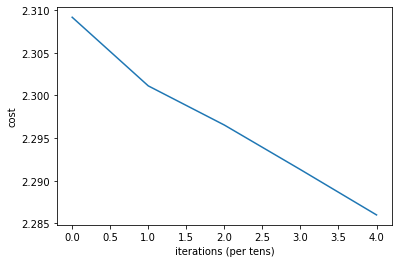

Parameters trained.
Train accuracy:  0.0
Test accuracy:  0.0


In [79]:
tf.reset_default_graph()                # to rerun model again without overwriting tf variable again
    
X, Y     = input_placeholder()          # create places for input and output
param    = initialization_param()       # weights initialize
y_pred   = forward_propagation(X,param) # forward propagation
cost     = compute_cost(y_pred, Y)      # calculate cost
optimizer= backpropagation(cost)        # backpropagation 
    
init = tf.global_variables_initializer() # initialize variables
costs = []
epochs = 5
batch_size = 32
print_cost = True

with tf.Session() as ss:                 # start session to compute computational graph
    ss.run(init)
        
    for ep in range(epochs):
        
        epoch_cost = 0.
        m = X_train.shape[0]
        permutation = list(np.random.permutation(m)) # permutation on 55,000 it shuffle 55,000 numbers
        shuffled_X, shuffled_Y = X_train[permutation], y_train[permutation]               # shuffle data
        complete_minibatches = math.floor(m / batch_size) 
        
        for k in range(0, complete_minibatches):
            minibatch_X = shuffled_X[k * batch_size : (k + 1) * batch_size]
            minibatch_Y = shuffled_Y[k * batch_size : (k + 1) * batch_size]
                
            _ , minibatch_cost = ss.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
            epoch_cost += minibatch_cost 
        
        if m % batch_size != 0:
                
            minibatch_X = shuffled_X[complete_minibatches * batch_size:]
            minibatch_Y = shuffled_Y[complete_minibatches * batch_size:]
            
            _ , minibatch_cost = ss.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
            epoch_cost += minibatch_cost 
            
        epoch_cost /= complete_minibatches
        
        # Print the cost every epoch
        if print_cost == True :
            print ("Cost after epoch %i: %f" % (ep+1, epoch_cost))
        
        costs.append(epoch_cost)
            
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.show()
        
    params = ss.run(param)
    print('Parameters trained.')
        
    # prediction
    correct_predict = tf.equal(tf.argmax(y_pred), tf.argmax(Y))

    # Calculate accuracy on the test data
    accuracy = tf.reduce_mean(tf.cast(correct_predict, dtype=tf.float32))
        
    print('Train accuracy: ',accuracy.eval({X:X_train, Y:y_train}))
    print('Test accuracy: ',accuracy.eval({X:X_test, Y:y_test}))
        
    tf.summary.FileWriter('./logs',ss.graph)
        

In [82]:
!tensorboard --logdir './logs'

TensorBoard 1.13.1 at http://LAPTOP-SH4MA2SS:6006 (Press CTRL+C to quit)
Traceback (most recent call last):
  File "c:\users\girrajjangid\anaconda3\envs\python_gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\girrajjangid\anaconda3\envs\python_gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\GirrajJangid\Anaconda3\envs\python_gpu\Scripts\tensorboard.exe\__main__.py", line 9, in <module>
  File "c:\users\girrajjangid\anaconda3\envs\python_gpu\lib\site-packages\tensorboard\main.py", line 57, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "c:\users\girrajjangid\anaconda3\envs\python_gpu\lib\site-packages\absl\app.py", line 300, in run
    _run_main(main, args)
  File "c:\users\girrajjangid\anaconda3\envs\python_gpu\lib\site-packages\absl\app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "c:\users\girrajjangid\anaconda3\envs\python_gpu\lib\site-packages\ten